In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

## task 01

Дана матрица объект-признак

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
и значения целевой переменной

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [2]:
X = pd.DataFrame([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [3]:
y = pd.DataFrame([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [4]:
def get_b(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    XTX = X.T.dot(X)

    np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)

    b = XTX_inv.dot(X.T).dot(y)

    return X, b

In [5]:
def get_e(X, b, y):
    z = X.dot(b)
    e = y - z

    return e

In [6]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [7]:
def get_R(e, y):
    R = 1 - sum_of_squares(e) / sum_of_squares(y)
    return R

In [8]:
X0 = X.values #весь датасет
y0 = y.values

In [9]:
X0, b0 = get_b(X0, y0)
e0 = get_e(X0, b0, y0)

In [10]:
e0.mean()

-6.483702463810914e-15

In [11]:
R0 = get_R(e0, y0)
R0

1.0

In [12]:
X01 = X[[0, 1]].values #0,1 столбцы. Да, дальше можно сделать по нормальному, итератором
y0 = y.values

In [13]:
X01, b01 = get_b(X01, y0)
e01 = get_e(X01, b01, y0)

In [14]:
e01.mean()

3.552713678800501e-16

In [15]:
R01 = get_R(e01, y0)
R01

0.18113594742585204

In [16]:
X02 = X[[0, 2]].values #0,2 столбцы
y0 = y.values

In [17]:
X02, b02 = get_b(X02, y0)
e02 = get_e(X02, b02, y0)

In [18]:
e02.mean()

-6.217248937900876e-16

In [19]:
R02 = get_R(e02, y0)
R02

0.7634246238793152

In [20]:
X03 = X[[0, 3]].values #0,3 столбцы
y0 = y.values

In [21]:
X03, b03 = get_b(X03, y0)
e03 = get_e(X03, b03, y0)

In [22]:
e03.mean()

4.618527782440651e-15

In [23]:
R03 = get_R(e03, y0)
R03

0.45329667831440745

In [24]:
X12 = X[[1, 2]].values #1,2 столбцы
y0 = y.values

In [25]:
X12, b12 = get_b(X12, y0)
e12 = get_e(X12, b12, y0)

In [26]:
e12.mean()

-5.684341886080802e-15

In [27]:
R12 = get_R(e12, y0)
R12

0.5479482734039012

In [28]:
X13 = X[[1, 3]].values #1,3 столбцы
y0 = y.values

In [29]:
X13, b13 = get_b(X13, y0)
e13 = get_e(X13, b13, y0)

In [30]:
e13.mean()

2.113864638886298e-14

In [31]:
R13 = get_R(e13, y0)
R13

0.6062055761129932

In [32]:
X23 = X[[2, 3]].values #2,3 столбцы
y0 = y.values

In [33]:
X23, b23 = get_b(X23, y0)
e23 = get_e(X23, b23, y0)

In [34]:
e23.mean()

1.3322676295501878e-15

In [35]:
R23 = get_R(e23, y0)
R23

0.6224419876505322

R02 максимум (первый и третий столбец признаков)

In [36]:
n = X02.shape[0]
m = 2 #два признака

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [37]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

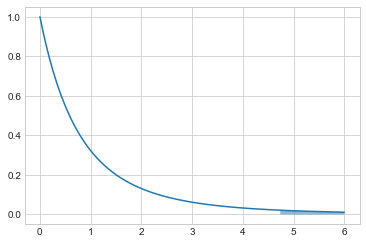

In [38]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [39]:
F = (R02 / k1) / ((1 - R02) / k2)
F

11.29443912292265

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

## task 02

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

H0 - конверсии равны, Н1 - не равны

In [40]:
a = np.concatenate([np.ones((77, 1)), np.zeros((2432, 1))])
b = np.concatenate([np.ones((60, 1)), np.zeros((1405, 1))])

In [41]:
na = len(a)
nb = len(b)
na, nb

(2509, 1465)

In [42]:
a_mean = a.mean()
b_mean = b.mean()
a_mean, b_mean

(0.03068951773614986, 0.040955631399317405)

In [43]:
z = np.concatenate([a, b])
z_mean = z.mean()
z_mean

0.03447408152994464

In [44]:
SS_b = na * (a_mean - z_mean) ** 2 + nb * (b_mean - z_mean) ** 2

SS_w = ((a - a_mean) ** 2).sum() + ((b - b_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [45]:
k = 2
nz = na + nb

k1 = k - 1
k2 = nz - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

In [46]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

In [47]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

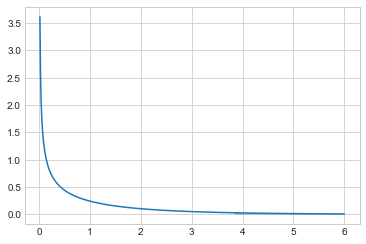

In [48]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Значение статистики НЕ попало в критическую область, поэтому отличие конверсий не является статистически значимым.

## task 03

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [49]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [50]:
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

In [51]:
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

In [52]:
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [53]:
x1.mean(), x2.mean(), x3.mean(), x4.mean()

(9.0, 9.0, 9.0, 9.0)

In [54]:
y1.mean(), y2.mean(), y3.mean(), y4.mean()

(7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091)

In [55]:
x1.var(ddof = 1), x2.var(ddof = 1), x3.var(ddof = 1), x4.var(ddof = 1)

(11.0, 11.0, 11.0, 11.0)

In [56]:
y1.var(ddof = 1), y2.var(ddof = 1), y3.var(ddof = 1), y4.var(ddof = 1)

(4.127269090909091, 4.127629090909091, 4.12262, 4.123249090909091)

In [57]:
np.corrcoef(x1, y1)

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [58]:
np.corrcoef(x2, y2)

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [59]:
np.corrcoef(x3, y3)

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

In [60]:
np.corrcoef(x4, y4)

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

In [61]:
b11 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b10 = y1.mean() - b11 * x1.mean()

b11, b10

(0.5000909090909093, 3.0000909090909094)

In [62]:
b21 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b20 = y2.mean() - b21 * x2.mean()

b21, b20

(0.5000000000000001, 3.000909090909089)

In [63]:
b31 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b30 = y3.mean() - b31 * x3.mean()

b31, b30

(0.49972727272727285, 3.002454545454544)

In [64]:
b41 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)
b40 = y4.mean() - b41 * x4.mean()

b41, b40

(0.49990909090909086, 3.0017272727272735)

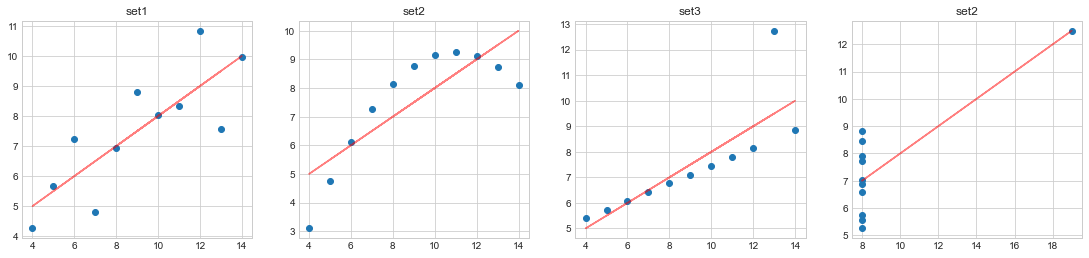

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4)
fig.set_size_inches(19, 4)

ax1.scatter(x1, y1)
ax1.plot(x1, b10 + b11 * x1, color='red', alpha=0.5)
ax1.set_title('set1')

ax2.scatter(x2, y2)
ax2.plot(x2, b20 + b21 * x2, color='red', alpha=0.5)
ax2.set_title('set2')

ax3.scatter(x3, y3)
ax3.plot(x3, b30 + b31 * x3, color='red', alpha=0.5)
ax3.set_title('set3')

ax4.scatter(x4, y4)
ax4.plot(x4, b40 + b41 * x4, color='red', alpha=0.5)
ax4.set_title('set2')

plt.show()